In [48]:
import pandas as pd

df = pd.read_csv("salary.csv")

df.head()


,Experience (Years),"Education Level (1-PhD, 2-Master's, 3-Bachelor's)",Job Title,Previous Salary,Salary (Target)
0,2,3,Junior Developer,28000,30000
1,3,3,Junior Developer,32000,35000
2,4,3,Software Engineer,35000,38000
3,5,3,Software Engineer,40000,42000
4,6,2,Software Engineer,45000,48000


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Job Title'] = le.fit_transform(df['Job Title'])

df.head()


,Experience (Years),"Education Level (1-PhD, 2-Master's, 3-Bachelor's)",Job Title,Previous Salary,Salary (Target)
0,2,3,1,28000,30000
1,3,3,1,32000,35000
2,4,3,5,35000,38000
3,5,3,5,40000,42000
4,6,2,5,45000,48000


In [50]:

X = df.drop(columns=['Salary (Target)'])  
y = df['Salary (Target)'] 

X.head()


,Experience (Years),"Education Level (1-PhD, 2-Master's, 3-Bachelor's)",Job Title,Previous Salary
0,2,3,1,28000
1,3,3,1,32000
2,4,3,5,35000
3,5,3,5,40000
4,6,2,5,45000


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((116, 4), (29, 4), (116,), (29,))

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_linear = lin_reg.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear


(15935759.92304584, 0.9592899452835735)

In [53]:
from sklearn.metrics import mean_absolute_percentage_error

accuracy_linear = 1 - mean_absolute_percentage_error(y_test, y_pred_linear)

mse_linear, r2_linear, accuracy_linear


(15935759.92304584, 0.9592899452835735, 0.9532174680437532)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

poly2.fit(X_train, y_train)

y_pred_poly2 = poly2.predict(X_test)

mse_poly2 = mean_squared_error(y_test, y_pred_poly2)
r2_poly2 = r2_score(y_test, y_pred_poly2)
accuracy_poly2 = 1 - mean_absolute_percentage_error(y_test, y_pred_poly2)

mse_poly2, r2_poly2, accuracy_poly2


(16923188.687587403, 0.9567674249125853, 0.9529330279132652)

In [55]:

poly3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

poly3.fit(X_train, y_train)

y_pred_poly3 = poly3.predict(X_test)

mse_poly3 = mean_squared_error(y_test, y_pred_poly3)
r2_poly3 = r2_score(y_test, y_pred_poly3)
accuracy_poly3 = 1 - mean_absolute_percentage_error(y_test, y_pred_poly3)

mse_poly3, r2_poly3, accuracy_poly3


(18288364.910348702, 0.9532798975530771, 0.9489017593381306)

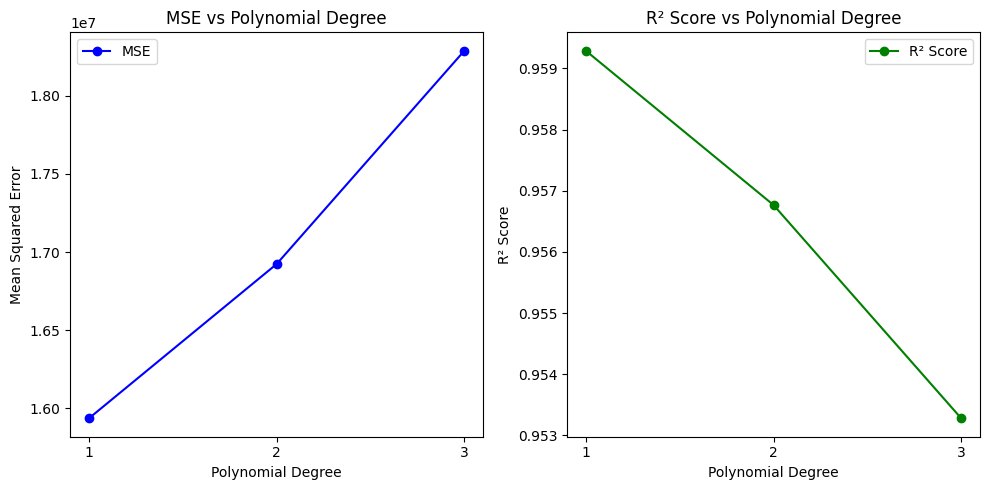

In [56]:
import matplotlib.pyplot as plt
import numpy as np

degrees = [1, 2, 3]
mse_values = [mse_linear, mse_poly2, mse_poly3]
r2_values = [r2_linear, r2_poly2, r2_poly3]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_values, marker='o', linestyle='-', color='b', label="MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Polynomial Degree")
plt.xticks(degrees)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, r2_values, marker='o', linestyle='-', color='g', label="R² Score")
plt.xlabel("Polynomial Degree")
plt.ylabel("R² Score")
plt.title("R² Score vs Polynomial Degree")
plt.xticks(degrees)
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\singh\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\singh\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\singh\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


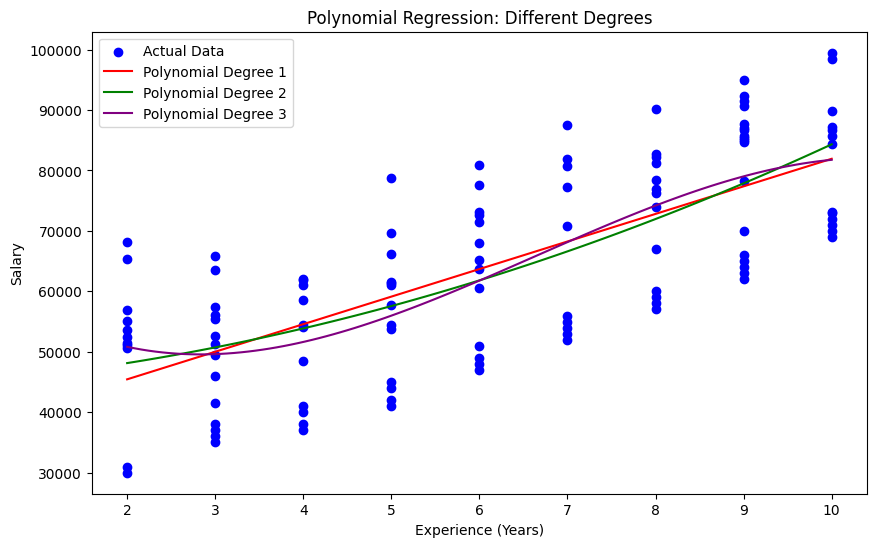

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Scatter plot of actual data
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Experience (Years)'], y_train, color='blue', label='Actual Data')

# Different polynomial degrees to visualize
degrees = [1, 2, 3]
colors = ['red', 'green', 'purple']

X_plot = np.linspace(X_train['Experience (Years)'].min(), X_train['Experience (Years)'].max(), 100).reshape(-1, 1)

for degree, color in zip(degrees, colors):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train[['Experience (Years)']])
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    X_poly_plot = poly.transform(X_plot)
    y_poly_pred = model.predict(X_poly_plot)

    plt.plot(X_plot, y_poly_pred, color=color, label=f'Polynomial Degree {degree}')

plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Polynomial Regression: Different Degrees')
plt.legend()
plt.show()
